<a href="https://colab.research.google.com/github/Greedisawesome/twitter_statement_analysis/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textblob import TextBlob
import tweepy
import pandas as pd
import numpy as np
import re
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
#twitter_credentials = files.upload()

In [ ]:
import twitter_credentials

In [ ]:
auth =  tweepy.OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True )

In [ ]:
posts = api.search('Israel lockdown' , count= 1000, result_type='recent', lang='en', include_entities = False, tweet_mode='extended')
pd.set_option('display.max_colwidth',5000)
df = pd.DataFrame([[tweet.full_text, tweet.id] for tweet in posts ], columns = ['Tweets','ID'])
for i in range(500):
  new_posts = api.search('Israel lockdown', count= 1000, max_id = df['ID'].iloc[-1], lang='en', include_entities = False, tweet_mode='extended')
  #print(new_posts[0])
  df_2 = pd.DataFrame([[tweet.full_text, tweet.id] for tweet in new_posts ], columns = ['Tweets','ID'])
  df = df.append(df_2)

In [ ]:
df

,Tweets,ID
0,@QAnon_Report @QSentMe83187800 @QTheWakeUp @qarmy1 @marc_Q1 @_qpatriot1776_ @PatriotAidan @QohnG @55true4u \n\nI have been reading the drops. Is Spain and Israel already on lockdown,1307769880213676042
1,RT @jncatron: Israel back under lockdown as West Bank eyes another shutdown https://t.co/aCzVL4IVoR,1307769180775735297
2,RT @haaretzcom: Police said they detained a driver who was speeding near the main protest site | Live updates https://t.co/LzBYX9XsSE,1307769099792064517
3,RT @AFilan: #Israeli police arrest driver suspected of trying to run over anti-Netanyahu protesters in Jerusalem https://t.co/RwSkjo8L19,1307769090346450945
4,Hello* #Israel is in Total Lockdown Day #2 Get Serious** 😷😷😷 https://t.co/k6qgDRK9qG,1307769066715787265
...,...,...
0,RT @business: Israel will become the only developed country to shut down again nationwide after a botched reopening https://t.co/vNvc1mOfbi,1304578792011296769
0,RT @business: Israel will become the only developed country to shut down again nationwide after a botched reopening https://t.co/vNvc1mOfbi,1304578792011296769
0,RT @business: Israel will become the only developed country to shut down again nationwide after a botched reopening https://t.co/vNvc1mOfbi,1304578792011296769
0,RT @business: Israel will become the only developed country to shut down again nationwide after a botched reopening https://t.co/vNvc1mOfbi,1304578792011296769


In [ ]:
#print(dir(posts[0]))

In [ ]:
def clean(text):
    #text = re.sub(r'@[A-Za-z0–9]+', '', text)
    #text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    #text = re.sub(r'https?:\/\/\S+', '', text)
    #text = re.sub(r'\n', '', text)
    #text = "".join([char.lower() for char in text if char not in string.punctuation])
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    text = text.strip() 
    return  text

In [ ]:
df['Tweets'] = df['Tweets'].apply(clean)

In [ ]:
df.drop_duplicates('Tweets', inplace=True)
df.shape

(7864, 2)

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
#Checking the sentiment of word lockdown itself
print(getPolarity('lockdown'),getSubjectivity('lockdown'))

0.0 0.0


In [ ]:
#Comparing results of NaiveBayesAlgorithm, but it takes too much time
'''from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
tb = Blobber(analyzer=NaiveBayesAnalyzer())
b = TextBlob(df['Tweets'].iloc[-1], analyzer=NaiveBayesAnalyzer()).sentiment.p_pos
print(df['Tweets'].iloc[-1], b.sentiment, getPolarity(df['Tweets'].iloc[-1]))

def getNBA(text):
  return TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment

df['NaiveBayesAnalysis'] = df['Tweets'].apply(getNBA)
'''

"from textblob.sentiments import NaiveBayesAnalyzer\nfrom textblob import Blobber\nimport nltk\nnltk.download('movie_reviews')\nnltk.download('punkt')\ntb = Blobber(analyzer=NaiveBayesAnalyzer())\nb = TextBlob(df['Tweets'].iloc[-1], analyzer=NaiveBayesAnalyzer()).sentiment.p_pos\nprint(df['Tweets'].iloc[-1], b.sentiment, getPolarity(df['Tweets'].iloc[-1]))\n\ndef getNBA(text):\n  return TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment\n\ndf['NaiveBayesAnalysis'] = df['Tweets'].apply(getNBA)\n"

In [ ]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,ID,Subjectivity,Polarity,Analysis
0,Report Q1 qpatriot1776 I have been reading the drops Is Spain and Israel already on lockdown,1307769880213676042,0.000000,0.000000,Neutral
1,Israel back under lockdown as West Bank eyes another shutdown,1307769180775735297,0.000000,0.000000,Neutral
2,Police said they detained a driver who was speeding near the main protest site Live updates,1307769099792064517,0.411111,0.134343,Positive
3,Israeli police arrest driver suspected of trying to run over anti Netanyahu protesters in Jerusalem,1307769090346450945,0.000000,-0.050000,Negative
4,Hello Israel is in Total Lockdown Day 2 Get Serious,1307769066715787265,0.708333,-0.166667,Negative
...,...,...,...,...,...
14,While America is on LOCKDOWN Trump is busy working for Israel More News,1304600450931609607,0.400000,0.300000,Positive
15,Daily Psalm 2 Day 8 How Majestic Full Video christian Christ Jesus Yeshua Bible God gospel Israel Yah truth messiah church BibleStudy EndTimes Rapture coronavirus lockdown,1304599284751503360,0.183333,0.116667,Positive
19,Really I am so sorry to hear that Israel took a decision to go in lockdown AGAIN What s the matter It seems like exist a big effort to broke the world spine economically and spiritually with FEAR I respect and admire Israel I didn t expected to hear this,1304593828201074690,0.506667,-0.060000,Negative
26,Israel imposes nationwide lockdown as coronavirus cases soar COVID19 Covid Coronavirus Trump Pence Biden Harris Pandemic Virus,1304582595393523712,0.000000,0.000000,Neutral


In [ ]:
compression_opts = dict(method='zip', archive_name='out.csv')  
df.to_csv('out.zip', index=False, compression=compression_opts)  
files.download('out.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

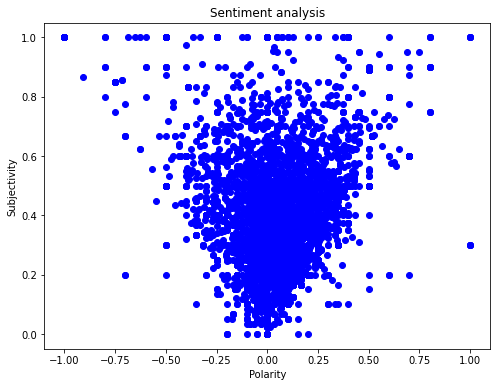

In [ ]:
plt.figure(figsize =(8,6))
plt.scatter(df['Polarity'], df['Subjectivity'], color = 'Blue')

plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
ptweets = df[df['Analysis'] == 'Positive'].shape[0] / df.shape[0]
ptweets = round(ptweets * 100,1)
ntweets = df[df['Analysis'] == 'Negative'].shape[0] / df.shape[0]
ntweets = round(ntweets * 100,1)
print('Percent of positive tweets about lockdown is {}%, while negative tweets are at {}% rate'.format(ptweets, ntweets))

Percent of positive tweets about lockdown is 44.8%, while negative tweets are at 20.9% rate


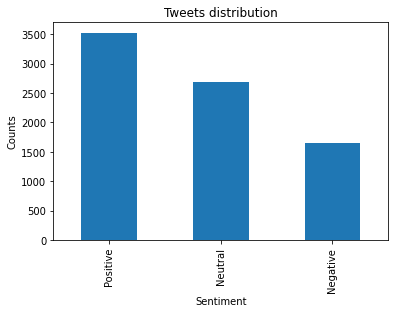

In [ ]:
plt.title('Tweets distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot.bar()
plt.show()

In [ ]:
df['Tweets'][df['Subjectivity'] == 1]

62                                                                                                                                                                              ulrich The only reason for lockdown in Israel is a prime minister with 3 indictments  nothing to do with
78                                                                                                                                                                     ulrich The only reason for lockdown in Israel is a prime minister with 3 indictments  nothing to do with COVID 19
1                                                                                                                                                                            Well  all this surrounding RBS s  UCL qualifier doesn t seem funny anymore  From lockdown in Israel to this
47                                                                                                                                                           

In [ ]:
df[df['Polarity'] == df['Polarity'].max()]

,Tweets,ID,Subjectivity,Polarity,Analysis
90,This was the best part of lockdown,1307728455803506689,0.3,1.0,Positive
47,Excellent article on corona and Israeli culture,1307674821199908864,1.0,1.0,Positive
28,Real Fly Israel returns to lockdown as COVID 19 cases mount,1306985036428849158,1.0,1.0,Positive
71,Perfect timing,1306105147945295872,1.0,1.0,Positive
88,how about tribute by for a guy listening in Israel about to go into another 3 weeks of national lockdown Not the greatest song in the world just a tribute,1305803453248217088,1.0,1.0,Positive
39,sheitan Country like Israel India s Best Friend imposed countrywide lockdown In In,1305302243734777856,0.3,1.0,Positive
3,Maybe the US will do another lockdown since our best buds Israel have,1305239658461310982,0.3,1.0,Positive
36,We will always support Israel Netanyahu is helping with lockdown When people can t control the spread there s lockdown there s guidelines government got the best choice for the people Godcomment,1305096642002067457,0.3,1.0,Positive


In [ ]:
df[df['Polarity'] == df['Polarity'].min()]

,Tweets,ID,Subjectivity,Polarity,Analysis
23,intl Thee are countries lockdown on hat trick so what makes difference to Israel if again lockdown Covid on reverse shots in dozens countries US is worst among world,1306991053694791680,1.0,-1.0,Negative
12,Trump the world peace keeper Israel going into 3 week lockdown to remove the evil,1306497470965460998,1.0,-1.0,Negative
42,PeaceDeal among countries not at war amp there s this worldwide pandemic worst in 100 years so Israel is about to imp,1306023017777111040,1.0,-1.0,Negative
81,Israel is under a 3 week lockdown This is insane,1305903032115355653,1.0,-1.0,Negative
1,Terrible optics Israel is on lockdown again and Bibi cannot be bothered with a mask,1305900090201198593,1.0,-1.0,Negative
19,Grim News As Coronavirus Deaths Skyrocket In US Lockdown Fight Looms If It Continues,1305257585122127872,1.0,-1.0,Negative
69,On the contrary any attempt to reach herdimmunity ahead of a vaccine would be pathologically evil That s why it has been rejected by every Government on the face of the earth Why deliberately front load deaths,1305238346860580864,1.0,-1.0,Negative
9,Who else is getting a news for you notification that Israel s imposing a nationwide lockdown as cases surge Pathetic Has every media outlet been instructed to use the word surge,1305235557619044352,1.0,-1.0,Negative
4,PublicHealth Given its population of 9 million the country now has one of the world s worst outbreaks It is now seei,1305227793769394178,1.0,-1.0,Negative
